In [2]:
import pandas as pd
df_jugadores = pd.read_csv("jugadores_cebollitas.csv")
df_jugadores.head()

,jugador_id,nombre,posición,edad,partidos_jugados,goles,asistencias,pases_completados (%),tiros_al_arco,precisión_tiros (%),minutos_jugados
0,1,Tara Alvarez,Portero,18,25,2,5,89.0,8,78.2,2125
1,2,Carol Mcclain,Mediocampista,32,12,2,8,77.5,49,68.5,1032
2,3,Robert Martin,Defensa,26,12,4,5,87.3,1,71.4,816
3,4,Mr. Robert Turner,Defensa,25,17,2,4,75.9,9,35.8,1496
4,5,Christopher Kennedy,Defensa,35,23,1,7,83.5,0,0.0,2047


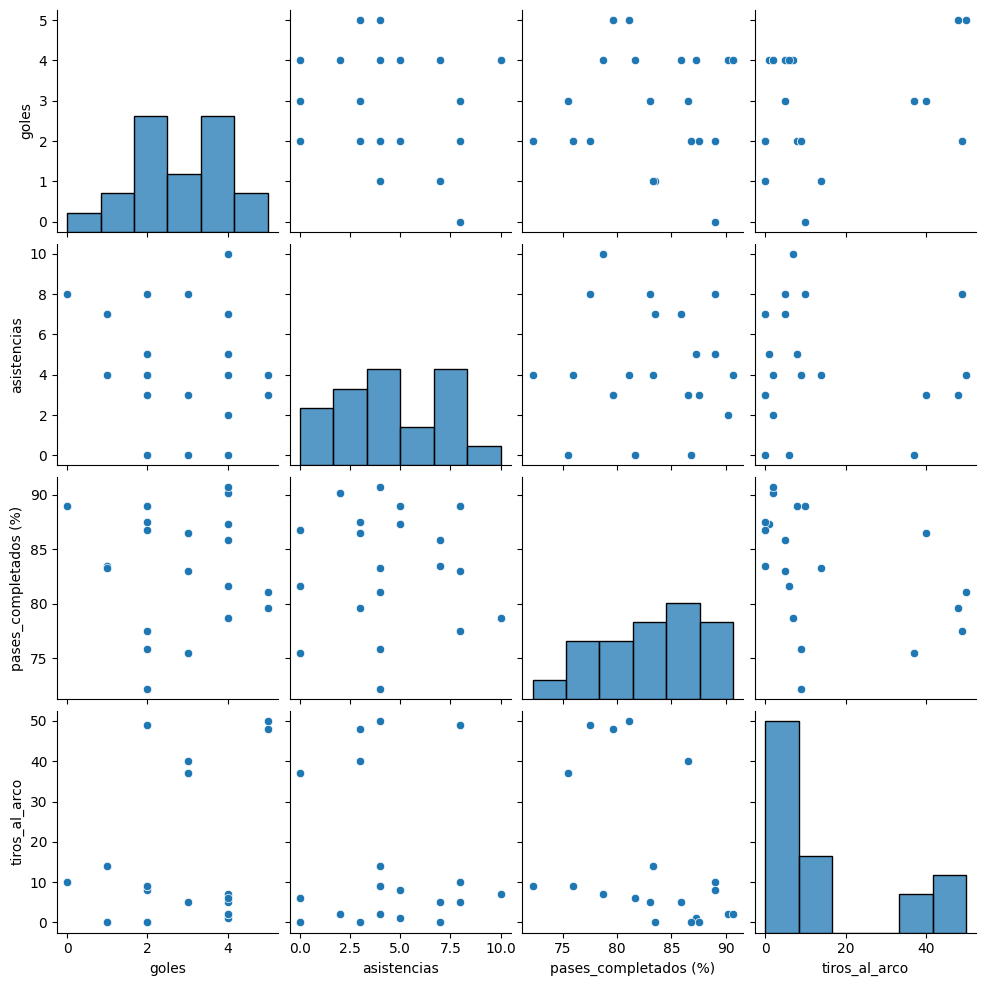

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_jugadores[['goles', 'asistencias', 'pases_completados (%)', 'tiros_al_arco']])
plt.show()

In [4]:
from sklearn.cluster import KMeans

X = df_jugadores[['goles', 'asistencias', 'pases_completados (%)', 'tiros_al_arco']]

kmeans = KMeans(n_clusters=3, random_state=42)
df_jugadores['cluster'] = kmeans.fit_predict(X)

df_jugadores.head()

/Users/joacogalt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,jugador_id,nombre,posición,edad,partidos_jugados,goles,asistencias,pases_completados (%),tiros_al_arco,precisión_tiros (%),minutos_jugados,cluster
0,1,Tara Alvarez,Portero,18,25,2,5,89.0,8,78.2,2125,0
1,2,Carol Mcclain,Mediocampista,32,12,2,8,77.5,49,68.5,1032,1
2,3,Robert Martin,Defensa,26,12,4,5,87.3,1,71.4,816,0
3,4,Mr. Robert Turner,Defensa,25,17,2,4,75.9,9,35.8,1496,2
4,5,Christopher Kennedy,Defensa,35,23,1,7,83.5,0,0.0,2047,0


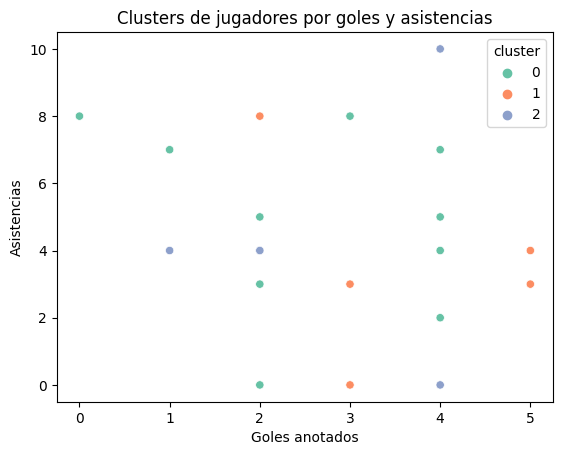

In [5]:
sns.scatterplot(x='goles', y='asistencias', hue='cluster', palette='Set2', data=df_jugadores)
plt.title("Clusters de jugadores por goles y asistencias")
plt.xlabel("Goles anotados")
plt.ylabel("Asistencias")
plt.show()

In [6]:
columnas_numericas = ['goles', 'asistencias', 'pases_completados (%)', 'tiros_al_arco']
perfiles = df_jugadores.groupby('cluster')[columnas_numericas].mean()
print(perfiles)

         goles  asistencias  pases_completados (%)  tiros_al_arco
cluster                                                          
0          2.6          4.9                  87.29            3.3
1          3.6          3.6                  80.04           44.8
2          2.6          4.4                  78.34            9.0


In [7]:
import ipywidgets as widgets

def clustering_interactivo(k):
    km = KMeans(n_clusters=k, random_state=42)
    df_jugadores['cluster_temp'] = km.fit_predict(X)
    
    sns.scatterplot(x='goles', y='asistencias', hue='cluster_temp', palette='Set1', data=df_jugadores)
    plt.title(f"Clustering jugadores con {k} clusters")
    plt.xlabel("Goles")
    plt.ylabel("Asistencias")
    plt.show()

widgets.interactive(clustering_interactivo, k=(2,6,1))

interactive(children=(IntSlider(value=4, description='k', max=6, min=2), Output()), _dom_classes=('widget-inte…